# Tutorial 16 - Solving ODEs using Neural Networks
Based on various resources from internet.

In [1]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam

In [2]:
def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
#Define a list of (weights, biases tuples, one for each layer."
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

In [3]:
# Define a sigmoid activation function. Can also be used from library. This is a simple definition.
def sigmoid_activation(x):
    "see https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))

In [4]:
# Define function y based on neural networks. Outputs are linearly related to biases and weights.
# Outputs of one layer are used as inputs to another layer via activation function.
def y(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = sigmoid_activation(outputs)    
    return outputs

In [5]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 100, 1])

In [6]:
dydx = elementwise_grad(y, 1) # this is the second partial derivative of y w/t x

**For the initial condition to be y0 = 0**

In [7]:
y0 = 1
x = np.linspace(0, 10).reshape((-1, 1))

**For the function of the exponential dy/dx = exp(-x)**

In [8]:
# Define the objective function.
def lossfunction(params, step):
    # The objective is to minimize to zero.
    # dydx = exp(-x) 
    zeq = dydx(params, x) -(np.exp(-x))
    ic = y(params, 0) - y0
    return np.mean(zeq**2) + ic**2

In [9]:
def callback(params, step, g):
    if step % 1000 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,
                                                      lossfunction(params, step)))

In [129]:
params = adam(grad(lossfunction), params,
              step_size=0.001, num_iters=5001, callback=callback) 

Iteration   0 lossfunction [[0.11005075]]
Iteration 1000 lossfunction [[0.00302654]]
Iteration 2000 lossfunction [[0.00084792]]
Iteration 3000 lossfunction [[0.00013653]]
Iteration 4000 lossfunction [[0.00010999]]
Iteration 5000 lossfunction [[0.00010627]]


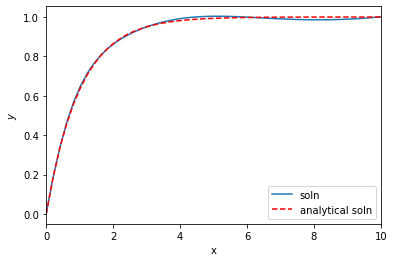

In [130]:
## for the condition of y0 = 0 loss function is as follows
tfit = np.linspace(0, 10).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln')
plt.plot(tfit,  (- np.exp(-tfit)+1), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 10])
plt.savefig('odenn.png')

**For the initial condition at y0 =1**

In [131]:
y1 = 1
x = np.linspace(0, 10).reshape((-1, 1))

In [132]:
# Define the objective function.
def lossfunction(params, step):
    # The objective is to minimize to zero.
    # dydx = exp(-x) 
    zeq = dydx(params, x) -(np.exp(-x))
    ic = y(params, 0) - y1
    return np.mean(zeq**2) + ic**2

In [133]:
param = adam(grad(lossfunction), params,
              step_size=0.001, num_iters=5001, callback=callback) 

Iteration   0 lossfunction [[1.00009356]]
Iteration 1000 lossfunction [[0.00112654]]
Iteration 2000 lossfunction [[0.00066552]]
Iteration 3000 lossfunction [[0.00038312]]
Iteration 4000 lossfunction [[0.00023785]]
Iteration 5000 lossfunction [[0.00014663]]


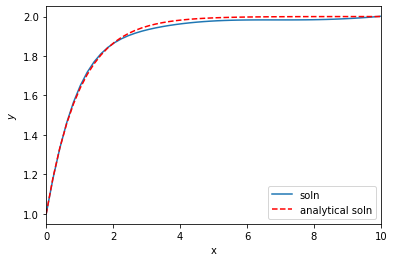

In [134]:
## for the initial condition of y0 =1 function behaviour is as follows

tfit = np.linspace(0, 10).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(param, tfit), label='soln')
plt.plot(tfit,  (- np.exp(-tfit)+2), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 10])
plt.savefig('odenn.png')

**Now for the function of 2*x^3 + exp(-x) we solve the equation at y0 = 0**

In [10]:
# Define the objective function.
def lossfunction(params, step):
    # The objective is to minimize to zero.
    # dydx = 2*x^3 + exp(-x) 
    zeq = dydx(params, x) -(2*(x**3)) - np.exp(-x)
    ic = y(params, 0) - y0
    return np.mean(zeq**2) + ic**2

In [11]:
params = adam(grad(lossfunction), params,
              step_size=0.001, num_iters=100001, callback=callback) 
# after 1lakh iterations, the solution for the analytical and by NN problems.

Iteration   0 lossfunction [[600782.91875503]]
Iteration 1000 lossfunction [[496374.02676497]]
Iteration 2000 lossfunction [[361149.49865868]]
Iteration 3000 lossfunction [[323961.83756236]]
Iteration 4000 lossfunction [[311178.95846724]]
Iteration 5000 lossfunction [[298025.91784275]]
Iteration 6000 lossfunction [[283864.59398501]]
Iteration 7000 lossfunction [[268898.70420355]]
Iteration 8000 lossfunction [[253350.62489288]]
Iteration 9000 lossfunction [[237359.70012071]]
Iteration 10000 lossfunction [[220963.7763537]]
Iteration 11000 lossfunction [[204071.34429877]]
Iteration 12000 lossfunction [[186728.50297529]]
Iteration 13000 lossfunction [[169422.70871142]]
Iteration 14000 lossfunction [[152529.41014763]]
Iteration 15000 lossfunction [[136203.72274889]]
Iteration 16000 lossfunction [[120554.58106276]]
Iteration 17000 lossfunction [[105681.93224548]]
Iteration 18000 lossfunction [[91676.19409442]]
Iteration 19000 lossfunction [[78618.92516434]]
Iteration 20000 lossfunction [[665

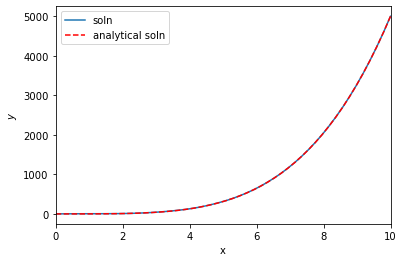

In [12]:
## for the condition of y0 = 0 loss function is as follows
tfit = np.linspace(0, 10).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln')
plt.plot(tfit,  ((x**4)/2 +1 + (-np.exp(-x))), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 10])
plt.savefig('odenn.png')

## Require large amount of time to iterate through the required function of tfe equation
ODE                                 $$dy/dx = 2x^3 + exp(-x)$$
Analytical solution for y0 = 0:     $$y(x) = x^4/2 -exp(-x) +1$$